In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',230)

In [11]:
# reading the input data and preview
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [12]:
print (churn.shape)
print (churn.info())
churn.describe()

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [14]:
print ("The cutomer-level information for each customer is represented by %d features"% (churn.shape[1]))

# unique number of custormers from the data

print ("Unique customers/MSISDN in the data: %d"%len(churn.mobile_number.unique()))


The cutomer-level information for each customer is represented by 226 features
Unique customers/MSISDN in the data: 99999


In [15]:
#list of columns
pd.DataFrame(churn.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


In [16]:
#### DATA CLEANING ####

def getMissingValues(missingCutoff):
    # retun the columns with more than missingCutoff% missing values.
    # missingCutoff, % values threshold for missing values
    missing = round(100*(churn.isnull().sum()/churn.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]


In [17]:
def imputeNan(data,imputeColList=False,missingColList=False):
    # impute the nan with 0
    # colList, list of columns for which nan is to be replaced with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [18]:
# HANDLING MISSING DATA #

getMissingValues(50)

There are 40 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [19]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(churn,imputeCol)

In [20]:
getMissingValues(50)

There are 4 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [21]:
# dropping the columns having more than 50% missing values
missingcol = list(getMissingValues(50).index)
churn.drop(missingcol,axis=1,inplace=True)
churn.shape

There are 4 features having more than 50% missing values/entries


(99999, 222)

In [22]:
# Missing values per column expressed as % of total number of values > 5%
getMissingValues(5)

There are 29 features having more than 5% missing values/entries


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [23]:
# checking if all these above features go missing together since they have the same 8% missing values in each feature.
missingcol = list(getMissingValues(5).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 29 features having more than 5% missing values/entries
There are 7745 customers/MSISDN's having missing values for ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9'] together


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for 7745 Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [29]:
imputeNan(churn,missingColList=missingcol)

In [30]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99999, 222)

In [31]:
# Missing values per column expressed as % of total number of values
getMissingValues(2)

There are 89 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
                      ... 
ic_others_6            4.0
ic_others_7            4.0
ic_others_8            5.0
date_of_last_rech_8    4.0
date_of_last_rech_9    5.0
Length: 89, dtype: float64

In [32]:
missingcol = list(getMissingValues(2).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn[churn[missingcol].isnull().all(axis=1)]),missingcol))
churn[churn[missingcol].isnull().all(axis=1)][missingcol].head()

There are 89 features having more than 2% missing values/entries
There are 381 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_othe

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Yes, It looks like there are 381 Customers for whom all these features are without any value. Let's drop these customers from the data.


In [33]:
churn=churn[~churn[missingcol].isnull().all(axis=1)]
churn.shape

(99618, 222)

In [34]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeNan(churn,missingColList=missingcol)

In [35]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 9 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [36]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,churn[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [37]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(churn[c].value_counts())
    churn[c].fillna(churn[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [38]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 4 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [39]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(churn[churn[missingcol].isnull().all(axis=1)])))

There are 4 features having more than 0% missing values/entries
There are 22 rows in total having missing values for these variables.


In [40]:
churn[churn['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn[churn['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn[churn['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
churn[churn['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [41]:
## Let's look for columns having all values as 0. ##

zero_columns=churn.columns[(churn == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 11 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [42]:
# Let's remove these columns as well. All take a single value '0'. 
churn.drop(zero_columns,axis=1,inplace=True)

In [43]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(churn.shape[0]))
print ("Number of features: {}".format(churn.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


# Fixing data types and columns names




In [45]:
churn.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(churn.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [46]:
# Converting dtype of date columns to datetime
for col in date_columns:
    churn[col] = pd.to_datetime(churn[col], format='%m/%d/%Y')


In [47]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 160.4 MB



There are some monthly features which are not in the standard naming (_6,_7,_8,_9)

In [48]:

# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [49]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

# Filter high-value customers

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).



In [50]:
rechcol = churn.filter(regex=('count')).columns
churn[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/churn['total_rech_num_'+str(i)]+1,2)

In [52]:

imputeNan(churn,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

In [53]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

In [54]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]
    

In [55]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]
churn.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [56]:
# calculating the avegare of first two months (good phase) total monthly recharge amount

avg_goodPhase =(churn.total_month_rech_6 + churn.total_month_rech_7)/2

# finding the cutoff which is the 70th percentile of the good phase average recharge amounts

hv_cutoff= np.percentile(avg_goodPhase,70)

# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.

hv_users = churn[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/churn.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%


# Tagging Churners¶
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

In [57]:

def getChurnStatus(data,churnPhaseMonth=9):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [58]:
hv_users['churn'] = getChurnStatus(hv_users,9)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))

There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


There are just 8.09% churn cases.
This indicated an highly imbalanced data set where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)

# DATA ANALYSIS

In [59]:

# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

In [60]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [61]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [62]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_users.groupby('churn')[colList].mean()


In [63]:
# Filtering the common monthly columns for each month
comcol = hv_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [64]:
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", hv_users.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 4))
print ("Columns other than monthly columns :", hv_users.shape[1] - (len(monthlycol) * 4))

Total number of columns in data : 232
Number of columns for each month :  57
Total monthly columns among the orignal columns (57*4): 228
Columns other than monthly columns : 4


In [65]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

In [66]:
# list of all the monthly columns 6,7,8,9
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [67]:
# list of column which are not monthly columns
nonmonthlycol = [col for col in hv_users.columns if col not in allmonthlycol]
nonmonthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

In [68]:
# Getting the distinct circle_id's in the data
hv_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

In [69]:
hv_users.drop('circle_id',axis=1,inplace=True)

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


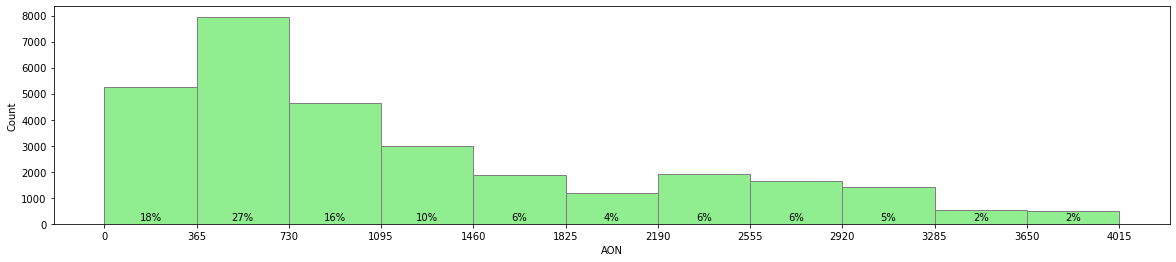

In [70]:
# Customers distribution of the age on network
print(hv_users.aon.describe())
plot_hist(hv_users,'aon',365)

Minimun Age on network is 180 days.
Average age on network for customers is 1200 days (3.2 years).
27% of the HV users are in their 2nd year with the network.
Almost 71% users have Age on network less than 4 years.
15% users are with the network from over 7 years.

In [71]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(churn['aon'], range(0,churn['aon'].max(),365), labels=range(0,int(round(churn['aon'].max()/365))-1))

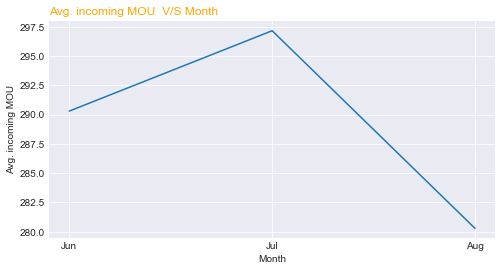

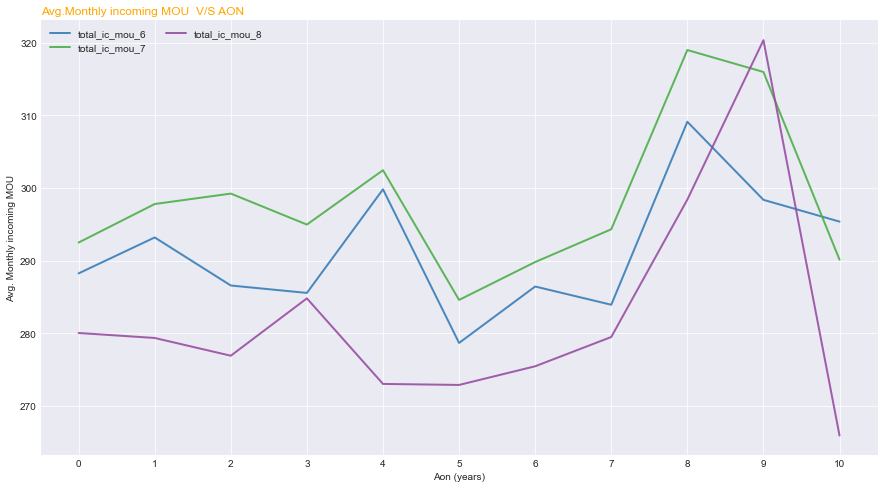

In [72]:

# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='incoming',colList=ic_col)

It is evident from the plot that,

The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg.
Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.

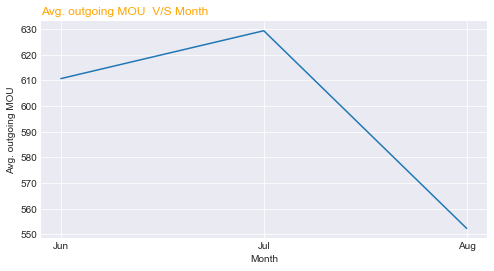

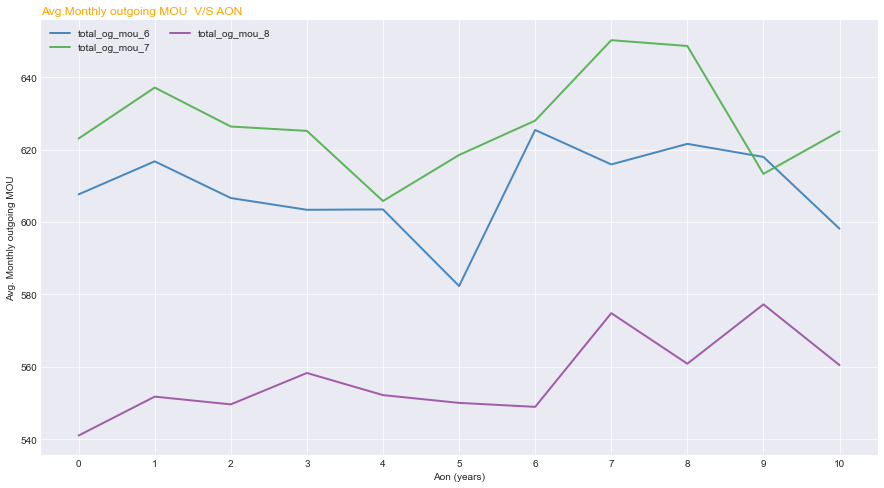

In [73]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='outgoing',colList=og_col)



What is the above plot saying ?

Overall, the Avg. total outgoing usage reduces with the increasing age on network.
Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the AON band between 7 - 8 years where it is almost simillar.
Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).
Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.
The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8 years.

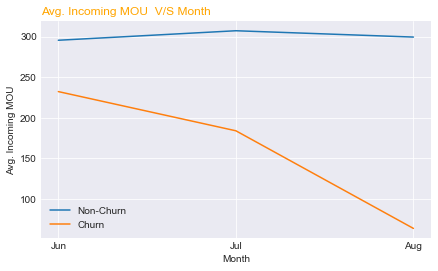

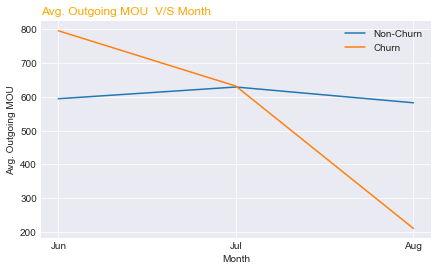

In [74]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')


It can be observed,

Churners Avg. Incoming/Outgoing MOU's drops drastically after the 2nd month,Jul.
While the non-churners Avg. MOU's remains consistant and stable with each month.
Therefore, users MOU is a key feature to predict churn.
Let's also see this trend in terms of actual numbers.

In [75]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.401726,307.108317,299.319664
1,232.221162,183.978888,63.813168


In [76]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,594.414582,629.096568,582.380539
1,795.591038,631.859433,210.659326


Create new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.

In [77]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,9):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)

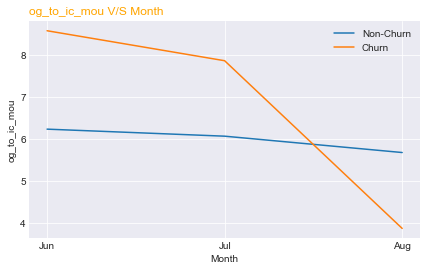

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.235602,6.067952,5.678424
1,8.580257,7.865938,3.870145


In [78]:
plot_byChurn(hv_users,'og_to_ic_mou')

total monthly rech amount also drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.

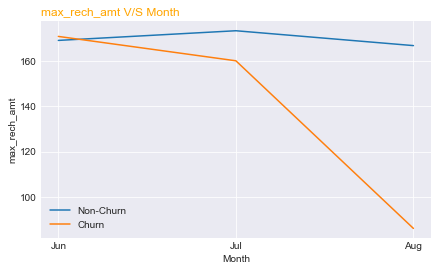

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.160943,173.437282,166.865250
1,170.930108,160.152192,86.026468


In [79]:

plot_byChurn(hv_users,'max_rech_amt')

maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.

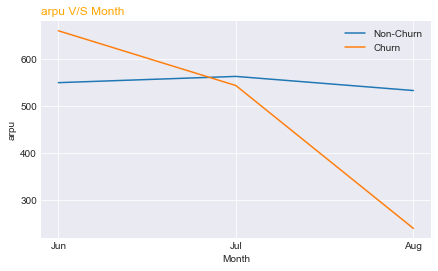

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.843524,563.190828,533.052496
1,660.695411,543.722952,238.631887


In [80]:
plot_byChurn(hv_users,'arpu')


Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
While it remains almost consistent for the non-churners.


In [81]:

#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

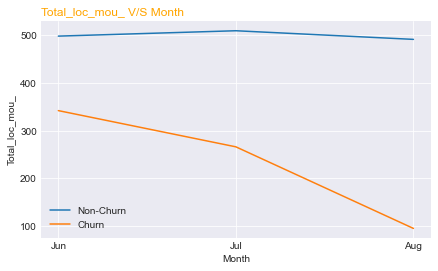

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.548969,509.835211,491.705600
1,342.113462,266.025666,94.701154


In [82]:
plot_byChurn(hv_users,'Total_loc_mou_')

It can be observed that,

The Total local call mou is genrally low for churners right from the begining of the good phase.
local mou pattern for the non-churners remains almost constant through out the 3 months.
The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

In [83]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])

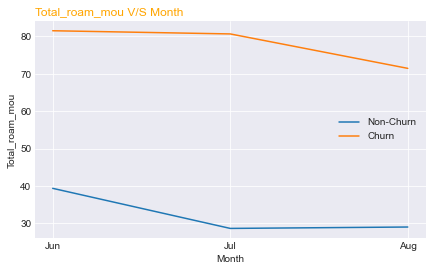

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.360033,28.643301,29.016734
1,81.504156,80.651973,71.443623


In [84]:
plot_byChurn(hv_users,'Total_roam_mou')

It can be observed that,

Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
People who are making/reciving more roaming calls during their tenure are more likely to churn.
This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

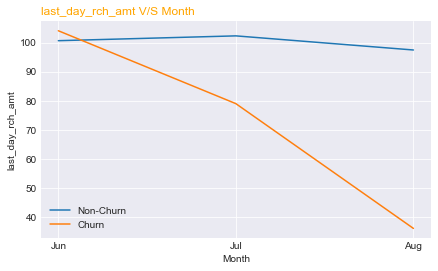

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.657232,102.318284,97.451724
1,104.085194,78.956989,35.955749


In [85]:
plot_byChurn(hv_users,'last_day_rch_amt')


The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

# MODELLING

In [86]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [88]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [89]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [90]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [91]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [92]:
# creating copy of the final hv_user dataframe
hv_users_PCA = hv_users.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

In [93]:
# removing the datatime columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [94]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = hv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [95]:

#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [111]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [126]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [127]:
# let PCA select the number of components basen on a variance cutoff 
pca_again = PCA(0.9)

In [128]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 12 components


(20934, 14)

In [129]:

X_train_pca = pca_again.fit_transform(X_train)
X_train_pca.shape

(20934, 14)

In [130]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8972, 14)

In [131]:

pca.explained_variance_ratio_[:50]

array([0.5458562 , 0.08594326, 0.06463628, 0.0533846 , 0.02866317,
       0.02651034, 0.02214792, 0.01999238, 0.0172565 , 0.01093447,
       0.00955642, 0.00754839, 0.00666442, 0.00636228, 0.00574794,
       0.00476984, 0.00460393, 0.00424086, 0.00384336, 0.00373873,
       0.0037179 , 0.00344855, 0.00318219, 0.00310263, 0.0027876 ,
       0.00270542, 0.00252491, 0.00245864, 0.00235812, 0.00207072,
       0.00200103, 0.00191862, 0.00186574, 0.00151394, 0.00147487,
       0.0014156 , 0.0013513 , 0.00115696, 0.00113218, 0.0010957 ,
       0.00102566, 0.00095355, 0.0009215 , 0.00086106, 0.00083424,
       0.00077938, 0.00075234, 0.00072757, 0.0006604 , 0.00064773])

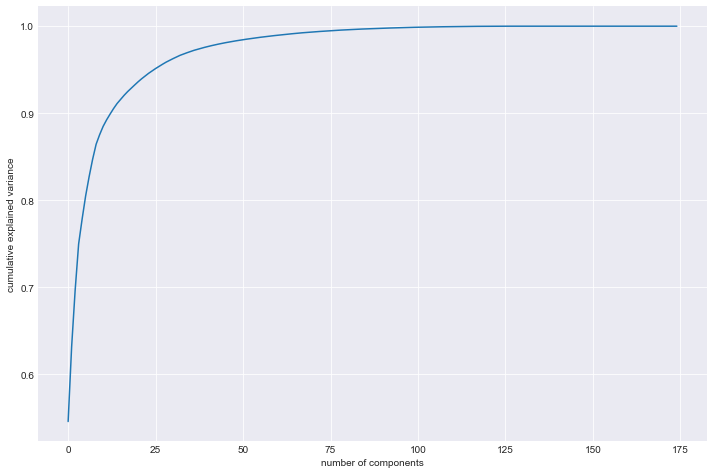

In [132]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 50 components are enough to describe 95% of the variance in the dataset¶
We'll choose 50 components for our modeling

In [133]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [134]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape


(20934, 35)

In [135]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.014575015238585058 , min corr:  -0.011449472720441126


Indeed - there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [136]:

#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

For the prediction of churn customers we will be fitting variety of models and select one which is the best predictor of churn. Models trained are,

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Boosting models - Gradient Boosting Classifier and XGBoost Classifier
5. SVM

# 1. Logistic Regression¶
Applying Logistic Regression on our principal components

In [137]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [138]:
modelfit(lr0, X_train_pca, y_train)


Model Report
Accuracy : 0.819
Recall/Sensitivity : 0.8276
AUC Score (Train): 0.889515
CV Score : Mean - 0.88562 | Std - 0.01002632 | Min - 0.8687235 | Max - 0.898172


In [139]:

# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.814699279761716
Sensitivity/Recall : 0.8147632311977716
Specificity: 0.8146353283256603
False Positive Rate: 0.1853646716743397
Positive predictive value: 0.2765957446808511
Negative Predictive value: 0.980603762578387
sklearn precision score value: 0.2765957446808511


In [141]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train)))

roc_auc_score(Train) 0.89


In [143]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.819017456831958
Sensitivity/Recall : 0.8276470588235294
Specificity: 0.8103878548403868
False Positive Rate: 0.1896121451596132
Positive predictive value: 0.278393351800554
Negative Predictive value: 0.9815491183879094
sklearn precision score value: 0.278393351800554


,churn,churn_Prob,final_predicted
21854,0,0.675825,1
9520,0,0.024022,0
21601,0,0.133104,0
28165,0,0.057655,0
10243,0,0.804945,1


Plotting the ROC Curve : An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

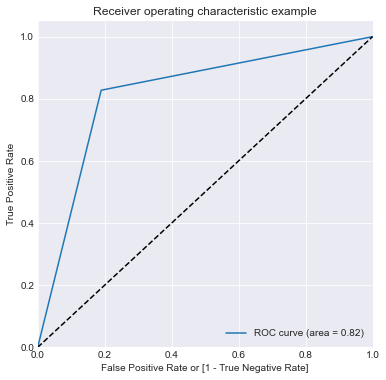

(array([0.        , 0.18961215, 1.        ]),
 array([0.        , 0.82764706, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [144]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

The roc curve is lying in the top left corner which is a sign of a good fit.

In [145]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.82



Finding Optimal Cutoff Point
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.081208  1.000000  0.000000
0.1   0.1  0.354877  0.978824  0.299730
0.2   0.2  0.518009  0.950588  0.479775
0.3   0.3  0.642018  0.918824  0.617552
0.4   0.4  0.737317  0.874706  0.725174
0.5   0.5  0.811789  0.827647  0.810388
0.6   0.6  0.865673  0.759412  0.875065
0.7   0.7  0.900592  0.690000  0.919206
0.8   0.8  0.922375  0.526471  0.957367
0.9   0.9  0.923044  0.170000  0.989602


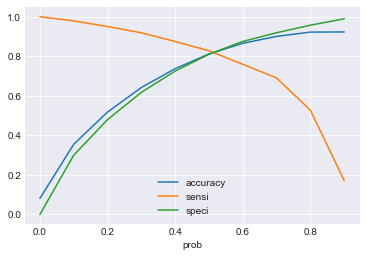

In [146]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)


From the curve above, 0.45 is the optimum point .¶
Although, other cutoff between 0.4 and 0.6 can also be taken but to keep the test sensitivity/recall significant we choose 0.45. At this point there is a balance of sensitivity, specificity and accuracy.

In [147]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr0,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.8122004538531645
Sensitivity/Recall : 0.8552941176470589
Specificity: 0.7691067900592701
False Positive Rate: 0.23089320994072995
Positive predictive value: 0.24664970313825277
Negative Predictive value: 0.983642529423499
sklearn precision score value: 0.24664970313825277


,churn,churn_Prob,final_predicted
21854,0,0.675825,1
9520,0,0.024022,0
21601,0,0.133104,0
28165,0,0.057655,0
10243,0,0.804945,1
...,...,...,...
12119,0,0.252357,0
24423,0,0.835390,1
14147,0,0.014331,0
23320,0,0.428747,0


In [148]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8076367801413749
Sensitivity/Recall : 0.8440111420612814
Specificity: 0.7712624182214683
False Positive Rate: 0.22873758177853162
Positive predictive value: 0.2429831595829992
Negative Predictive value: 0.9827107131830812
sklearn precision score value: 0.2429831595829992


,churn,churn_Prob,final_predicted
4265,0,0.383364,0
29221,0,0.571935,1
974,0,0.483863,1
1602,0,0.359905,0
10225,0,0.199232,0
...,...,...,...
6262,0,0.196505,0
1424,0,0.069555,0
18308,0,0.355021,0
22978,0,0.168786,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

train sensitivity : 86.47%, train roc auc score : 82.1%
test sensitivity : 84.40%, test roc auc score : 81.21%

# 2. Decision Tree
Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [149]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train)


Model Report
Accuracy : 0.7806
Recall/Sensitivity : 0.7835
AUC Score (Train): 0.848346
CV Score : Mean - 0.807072 | Std - 0.007506454 | Min - 0.7954422 | Max - 0.8176153


In [150]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7509597777527297
Sensitivity/Recall : 0.7186629526462396
Specificity: 0.7832566028592197
False Positive Rate: 0.21674339714078023
Positive predictive value: 0.22386117136659436
Negative Predictive value: 0.9697015149242538
sklearn precision score value: 0.22386117136659436


In [151]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [152]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   22.0s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   34.1s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [153]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8260273202008593 using {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [154]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)


In [155]:
modelfit(dt_final,X_train_pca,y_train)


Model Report
Accuracy : 0.813
Recall/Sensitivity : 0.8694
AUC Score (Train): 0.897587
CV Score : Mean - 0.8160759 | Std - 0.008779809 | Min - 0.8015054 | Max - 0.829117


In [156]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7567380177957105
Sensitivity/Recall : 0.7562674094707521
Specificity: 0.7572086261206687
False Positive Rate: 0.24279137387933122
Positive predictive value: 0.21319199057714958
Negative Predictive value: 0.9727626459143969
sklearn precision score value: 0.21319199057714958


In [157]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85      8254
           1       0.21      0.76      0.33       718

    accuracy                           0.76      8972
   macro avg       0.59      0.76      0.59      8972
weighted avg       0.91      0.76      0.81      8972



Even after hyperparameter tuning for the Decision Tree. The recall rate is 67.54% which is not very significant to predict the churn.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [159]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8129943298937543
Sensitivity/Recall : 0.8694117647058823
Specificity: 0.7565768950816263
False Positive Rate: 0.2434231049183737
Positive predictive value: 0.23993506493506495
Negative Predictive value: 0.9849736022742656
sklearn precision score value: 0.23993506493506495


,churn,churn_Prob,final_predicted
21854,0,0.777876,1
9520,0,0.000000,0
21601,0,0.021808,0
28165,0,0.000000,0
10243,0,0.551528,1


     prob  accuracy     sensi     speci
0.0   0.0  0.424190  1.000000  0.373297
0.1   0.1  0.490542  0.997059  0.445773
0.2   0.2  0.610586  0.971765  0.578663
0.3   0.3  0.646699  0.958235  0.619164
0.4   0.4  0.706697  0.924118  0.687481
0.5   0.5  0.765740  0.869412  0.756577
0.6   0.6  0.837824  0.768824  0.843922
0.7   0.7  0.882679  0.654706  0.902828
0.8   0.8  0.900974  0.560000  0.931112
0.9   0.9  0.922136  0.252941  0.981283


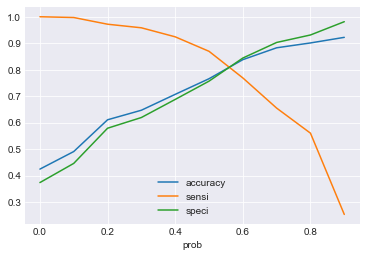

In [160]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [162]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8057990751671366
Sensitivity/Recall : 0.9241176470588235
Specificity: 0.6874805032754497
False Positive Rate: 0.31251949672455026
Positive predictive value: 0.20720126615668688
Negative Predictive value: 0.9903385260635111
sklearn precision score value: 0.20720126615668688


,churn,churn_Prob,final_predicted
21854,0,0.777876,1
9520,0,0.000000,0
21601,0,0.021808,0
28165,0,0.000000,0
10243,0,0.551528,1


In [163]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7398300342941685
Sensitivity/Recall : 0.7952646239554317
Specificity: 0.6843954446329052
False Positive Rate: 0.31560455536709475
Positive predictive value: 0.1797858942065491
Negative Predictive value: 0.9746376811594203
sklearn precision score value: 0.1797858942065491


,churn,churn_Prob,final_predicted
4265,0,0.611885,1
29221,0,0.000000,0
974,0,0.666289,1
1602,0,0.856405,1
10225,0,0.000000,0


Decision tree after selecting optimal cut-off also is resulting in a model with
Train Recall : 89.78% and Train Roc_auc_score : 82.40
Test Recall : 78.13% and Test Roc_auc_score : 76.56
Random Forest still seems overfitted to the data.

Overall, the Logistic Regression model with probability cut-off = 0.45, performs best. It achieved the best recall accuracy of 84.4% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

# We will use an instance of Random Forest classifier to identify the features most relevant to churn.

In [164]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.7min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

Strategies to manage customer churn¶
It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

In [ ]:
#IMPROVING OUTGOING SERVICES

# Outgoing Mou
plot_byChurnMou(og_col,'Outgoing')

In [ ]:
#Improving Roaming services


plot_byChurn(hv_users,'Total_roam_mou')


Stratergy suggestions,

Churners show higher roaming usage than non-churners.
The Network operators must futher investigate their roaming tariffs, and quality of service.
Might be that the roaming tariffs offered are less competitive than their competitor.
It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
New campaigns which targets the roaming customers can be rolled out. Like,
Discounted roaming rates during particular hours of the day.
Free monthly roaming mou's depending on the users past roaming mou usage.